_Problem Statement_: `To build a Machine Learning Model to predict the flight price `

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Readind the csv file and showing 1st 5 rows of data
df =  pd.read_excel(r"Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#Dimensions
df.shape

(10683, 11)

In [4]:
#concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Percentage of duplicates attributes
(df.duplicated().sum() / len(df)) * 100

2.059346625479734

In [6]:
#dropping duplicates
df.drop_duplicates(keep='first', inplace=True)

__Observations__

1. There are 10683 rows out of which 2.059% are duplicates.
2. We've 11 features/columns.

---

## 1. Feature Analysis

#### 1.1 Airline
* Name of the airline used for traveling

In [7]:
#sum of null values in this columns
df.Airline.isna().sum()

0

In [8]:
# relative frequency by dividing all unique values by the sum of  values.
df.Airline.value_counts(normalize=True)

Jet Airways                          0.353627
IndiGo                               0.195259
Air India                            0.161999
Multiple carriers                    0.114308
SpiceJet                             0.077894
Vistara                              0.045685
Air Asia                             0.030488
GoAir                                0.018542
Multiple carriers Premium economy    0.001242
Jet Airways Business                 0.000573
Vistara Premium economy              0.000287
Trujet                               0.000096
Name: Airline, dtype: float64

__Observations__

1. `Airline` is a  Nominal Categorical data
2. It contains 12 unique values with heavy imbalance.

#### 1.2 Date_of_Journey
* Date at which a person traveled

In [9]:
#sum of null values in this columns
df.Date_of_Journey.isna().sum()

0

In [10]:
# relative frequency by dividing all unique values by the sum of  values.
df.Date_of_Journey.value_counts(normalize=True)

6/06/2019     0.046832
18/05/2019    0.046449
9/06/2019     0.046354
12/06/2019    0.046163
21/05/2019    0.046067
9/05/2019     0.044538
21/03/2019    0.039377
15/05/2019    0.038421
27/05/2019    0.035267
27/06/2019    0.032400
24/06/2019    0.031540
1/06/2019     0.031540
3/06/2019     0.031157
15/06/2019    0.030011
24/03/2019    0.030011
6/03/2019     0.028864
27/03/2019    0.027717
24/05/2019    0.027334
6/05/2019     0.026952
1/05/2019     0.026188
12/05/2019    0.024754
1/04/2019     0.024467
3/03/2019     0.020740
9/03/2019     0.019019
15/03/2019    0.015483
18/03/2019    0.014910
01/03/2019    0.014432
12/03/2019    0.013476
9/04/2019     0.011947
3/04/2019     0.010513
21/06/2019    0.010418
18/06/2019    0.010035
6/04/2019     0.009557
09/03/2019    0.009557
06/03/2019    0.009080
27/04/2019    0.008984
24/04/2019    0.008793
03/03/2019    0.008793
3/05/2019     0.008602
15/04/2019    0.008506
21/04/2019    0.007837
18/04/2019    0.006404
12/04/2019    0.006021
1/03/2019  

__Observations__

1. It has no null values
2. We can divide `Date_of_Journey` to two different columns as `date` and `month`

#### 1.3 Source
* Starting location of flight

In [11]:
#sum of null values in this columns
df.Source.isna().sum()

0

In [12]:
# relative frequency by dividing all unique values by the sum of  values.
df.Source.value_counts(normalize=True)

Delhi       0.415368
Kolkata     0.273344
Banglore    0.208258
Mumbai      0.066616
Chennai     0.036414
Name: Source, dtype: float64

_Observation:_

1.`Source` is categorical feature

2.It contains 5 Unique values 

#### 1.4 Destination
* Ending location of flight

In [13]:
#sum of null values in this columns
df.Destination.isna().sum()

0

In [14]:
# relative frequency by dividing all unique values by the sum of  values.
df.Destination.value_counts(normalize=True)

Cochin       0.415368
Banglore     0.273344
Delhi        0.120902
New Delhi    0.087355
Hyderabad    0.066616
Kolkata      0.036414
Name: Destination, dtype: float64

_Observation:_

1.`Destination` is categorical feature

2.It contains 6 Unique values 

#### 1.5 Route
* This contains information on starting and ending location of the journey in the standard format used by airlines.

In [15]:
#sum of null values in this columns
df.Route.isna().sum()

1

In [16]:
# relative frequency by dividing all unique values by the sum of  values.
df.Route.value_counts(normalize=True)

DEL → BOM → COK          0.227108
BLR → DEL                0.146817
CCU → BOM → BLR          0.093577
CCU → BLR                0.069203
BOM → HYD                0.059358
                           ...   
CCU → IXB → DEL → BLR    0.000096
CCU → IXZ → MAA → BLR    0.000096
BOM → COK → MAA → HYD    0.000096
BOM → BBI → HYD          0.000096
BOM → UDR → DEL → HYD    0.000096
Name: Route, Length: 128, dtype: float64

_Observations:_

1.`Route` has a null value , we can delete that row

#### 1.6 Dep_Time
* Departure time of flight from starting location

In [17]:
#sum of null values in this columns
df.Dep_Time.isna().sum()

0

In [18]:
# relative frequency by dividing all unique values by the sum of  values.
df.Dep_Time.value_counts(normalize=True)

18:55    0.022269
17:00    0.021695
07:05    0.019306
07:10    0.019211
10:00    0.018733
           ...   
04:50    0.000096
12:05    0.000096
03:00    0.000096
21:35    0.000096
04:15    0.000096
Name: Dep_Time, Length: 222, dtype: float64

_observations:_

1. We can convert the `Dep_Time` into two columns `D_Hour` and `D_Min`

#### 1.7 Arrival_Time
* Arrival time of flight at destination

In [19]:
#sum of null values in this columns
df.Arrival_Time.isna().sum()

0

In [20]:
# relative frequency by dividing all unique values by the sum of  values.
df.Arrival_Time.value_counts(normalize=True)

19:00           0.039377
21:00           0.034407
19:15           0.031826
16:10           0.014719
12:35           0.011660
                  ...   
03:40 13 Mar    0.000096
23:25 10 Jun    0.000096
10:00 25 Mar    0.000096
02:10 22 Mar    0.000096
11:05 25 May    0.000096
Name: Arrival_Time, Length: 1343, dtype: float64

_Observations:_

1. We can divide `Arrival_Time` into `A_Hour` and `A_Min`

#### 1.8 Duration
* Duration of flight in hours/minutes

In [21]:
#sum of null values in this columns
df.Duration.isna().sum()

0

In [22]:
# relative frequency by dividing all unique values by the sum of  values.
df.Duration.value_counts(normalize=True)

2h 50m     0.051993
1h 30m     0.036892
2h 45m     0.032018
2h 55m     0.031731
2h 35m     0.031444
             ...   
31h 30m    0.000096
36h 25m    0.000096
33h 45m    0.000096
35h 35m    0.000096
37h 10m    0.000096
Name: Duration, Length: 368, dtype: float64

_Observation:_

1.  It is the differnce betwwen Departure Time and Arrival time

#### 1.9 Total_Stops
* Number of total stops flight took before landing at the destination.

In [23]:
#sum of null values in this columns
df.Total_Stops.isna().sum()

1

In [24]:
df.Total_Stops.value_counts(normalize=True)

1 stop      0.537660
non-stop    0.332154
2 stops     0.125980
3 stops     0.004110
4 stops     0.000096
Name: Total_Stops, dtype: float64

_Observation:_

1.`Total_Stops` is Ordinal Categorical type

2.It has one null value we can delete the row

#### 1.10 Additional_Info
* Shown any additional information about a flight


In [25]:
#sum of null values in this columns
df.Additional_Info.isna().sum()

0

In [26]:
df.Additional_Info.value_counts(normalize=True)

No info                         0.782089
In-flight meal not included     0.184077
No check-in baggage included    0.030393
1 Long layover                  0.001816
Change airports                 0.000669
Business class                  0.000382
No Info                         0.000287
1 Short layover                 0.000096
2 Long layover                  0.000096
Red-eye flight                  0.000096
Name: Additional_Info, dtype: float64

_Observations:_

* As No info has 80% Value we can delete this Feature

#### 1.11 Price
* Price of the flight

In [27]:
#sum of null values in this columns
df.Price.isna().sum()

0

In [28]:
df.Price.value_counts(normalize=True)

10262    0.024658
10844    0.020262
7229     0.015388
4804     0.015292
4823     0.012520
           ...   
10759    0.000096
19172    0.000096
4839     0.000096
6633     0.000096
4098     0.000096
Name: Price, Length: 1870, dtype: float64

In [29]:
#Removing null values 
df.dropna(inplace = True)

---

## 2. EDA

#### 2.1 Date_of_Journey 

* Column `Date_of_Journey`  is a object data type

* we have to convert this datatype into timestamp so as to use this column properly for prediction

* We will divide it into two columns `Journey_Month` and `Journey_day`

In [30]:
#Creating a new column called Journey_day on which day the journey starts
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [31]:
#Creating a new column called Journey_month on which day the journey starts
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [32]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


#### 2.2 Dep_Time

* Column `Dep_Time`  is a object data type

* we have to convert this datatype into timestamp so as to use this column properly for prediction

* We will divide it into two columns `Dep_Hr` and `Dep_Min`

In [33]:
# Creating a new column called Dep_Hr represents at what hour the Flight departure
df["Dep_Hr"] = pd.to_datetime(df.Dep_Time).dt.hour

In [34]:
# Creating a new column called Dep_Min represents at what Minute the Flight departure
df["Dep_Min"] = pd.to_datetime(df.Dep_Time).dt.minute

In [35]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


#### 2.2 Arrival_Time

* Column `Arrival_Time`  is a object data type

* we have to convert this datatype into timestamp so as to use this column properly for prediction

* We will divide it into two columns `Arrival_Hr` and `Arrival_Min`

In [36]:
# Creating a new column called Arrival_Hr represents at what hour the Flight Arrive
df["Arrival_Hr"] = pd.to_datetime(df.Arrival_Time).dt.hour

In [37]:
# Creating a new column called Arrive_Min represents at what Minute the Flight Arrive
df["Arrival_Min"] = pd.to_datetime(df.Arrival_Time).dt.minute

In [38]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25


#### 2.3 Duration

* Column `Duration`  is a object data type

* we have to convert this datatype into timestamp so as to use this column properly for prediction

* We will divide it into two columns `Dur_Hr` and `Dur_Min`

In [39]:
Dur_Hr=[]
Dur_Min=[]
duration = list(df.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]         
for i in range(len(duration)):
    Dur_Hr.append(int(duration[i].split(sep = "h")[0]))    
    Dur_Min.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [40]:
df["Dur_Hr"]=Dur_Hr
df["Dur_Min"]=Dur_Min

In [41]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min,Dur_Hr,Dur_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0


#### 2.4 Dropping features

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  Journey_day      10462 non-null  int64 
 12  Journey_month    10462 non-null  int64 
 13  Dep_Hr           10462 non-null  int64 
 14  Dep_Min          10462 non-null  int64 
 15  Arrival_Hr       10462 non-null  int64 
 16  Arrival_Min      10462 non-null  int64 
 17  Dur_Hr           10462 non-null

In [43]:
#Dropping the features because we created alternative columns for them
df.drop('Date_of_Journey',inplace=True,axis=1)

df.drop('Dep_Time',inplace=True,axis=1)

df.drop('Arrival_Time',inplace=True,axis=1)

df.drop('Duration',inplace=True,axis=1)

In [44]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min,Dur_Hr,Dur_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [45]:
#As per 1.10
df.drop(["Additional_Info"], axis = 1, inplace = True)

In [46]:
#As we knoe Route and Total_Stops are related we can drop Route
df.drop(["Route"], axis = 1, inplace = True)

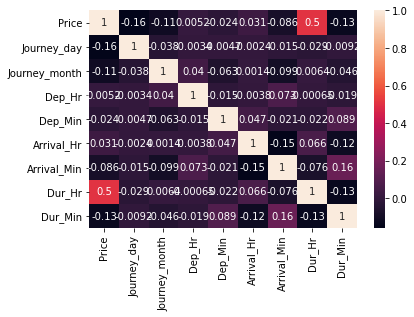

In [47]:
#Correlation in 'df.csv'
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

_Observations:_

* There is no correlation between Features so no need to delete any feature

---

#### 3 Encoding

* For nominal data we use Onehot encoding

* For Ordinal data we use Label encoder

##### 3.1 Airline

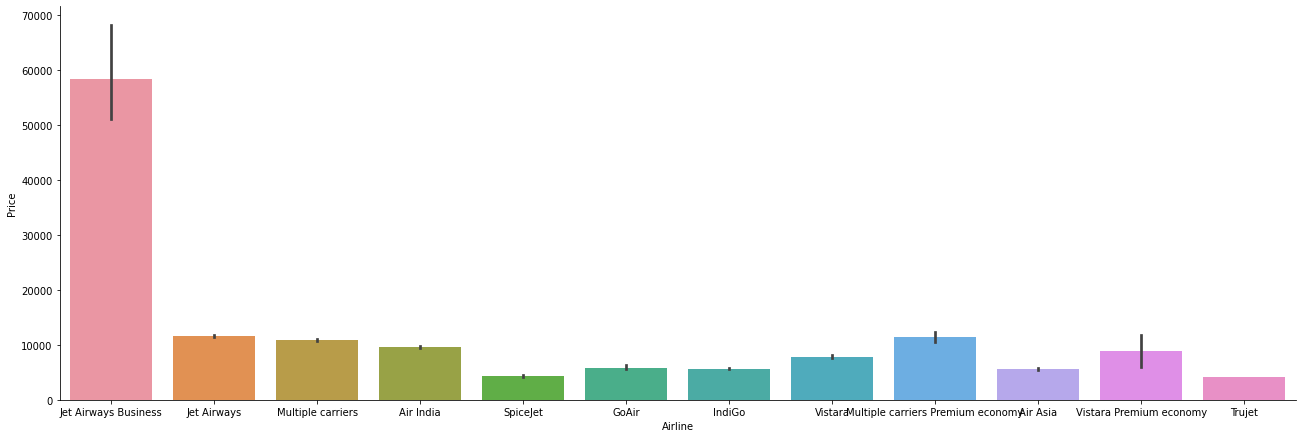

In [48]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data =df.sort_values("Price", ascending = False), kind="bar", height = 6, aspect = 3)
plt.show()

In [49]:
# As Airline is Nominal Categorical data from 1.1  we will perform OneHotEncoding
Airline = pd.get_dummies(df.Airline, drop_first= True)
Airline.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


##### 3.2 Source

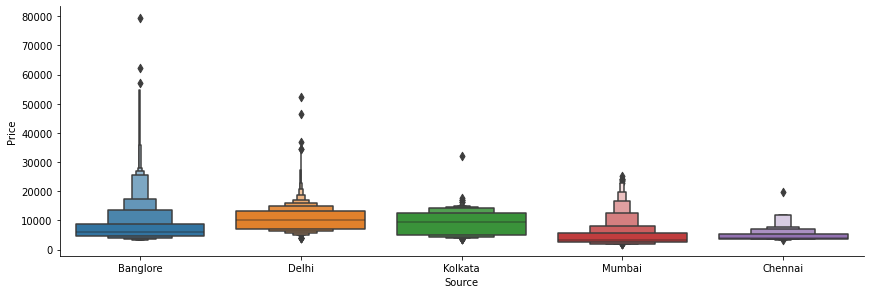

In [50]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [51]:
# As Source is Nominal Categorical data from 1.3  we will perform OneHotEncoding
Source = pd.get_dummies(df.Source, drop_first= True)
Source.head(3)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0


##### 3.3 Destination

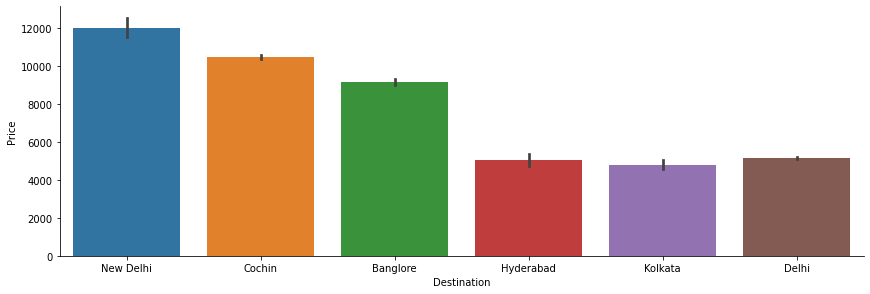

In [52]:
#  Destination vs Price
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="bar", height = 4, aspect = 3)
plt.show()

In [53]:
# As Destination is Nominal Categorical data  from 1.4 we will perform OneHotEncoding

Destination = df.Destination
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


##### 3.3 Total Stops 

In [54]:
# As this is case of Ordinal Categorical type from 1.9  we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min,Dur_Hr,Dur_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0


In [55]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
df_train=pd.concat([df, Airline, Source, Destination], axis = 1)


In [56]:
df_train.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arrival_Hr,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0


In [57]:
#We can drop Airline,Source,Destination from data set
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min,Dur_Hr,Dur_Min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df.shape

(10462, 13)

---

## 4 Test Set

* It doesnot contain the dependent Value i.e; `Price`

* We will repeat all the steps 

In [59]:
df_Test = pd.read_excel(r"Test_set.xlsx")

In [60]:
df_Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


##### 4.1 Data info

In [61]:
#dropping dupliucate and null values
df_Test.dropna(inplace = True)
(df_Test.duplicated().sum() / len(df)) * 100

0.24851844771554193

_Observation:_

* Doest have many duplicate values we can ignore them

In [62]:
print("-------------Shape of the data------------")
print(df_Test.shape)
print("-------------Information about data------------")
print(df_Test.info())
print("--------Null values------")
print(df_Test.isnull().sum())


-------------Shape of the data------------
(2671, 10)
-------------Information about data------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 229.5+ KB
None
--------Null values------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Sto

##### 4.2 EDA


In [63]:
#Date_of_Journey
df_Test["Journey_day"] = pd.to_datetime(df_Test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_Test["Journey_month"] = pd.to_datetime(df_Test.Date_of_Journey, format = "%d/%m/%Y").dt.month

#Departure Time
df_Test["Dep_Hr"] = pd.to_datetime(df_Test.Dep_Time).dt.hour
df_Test["Dep_Min"] = pd.to_datetime(df_Test.Dep_Time).dt.minute

#Arrival Time
df_Test["Arrival_Hr"] = pd.to_datetime(df_Test.Arrival_Time).dt.hour
df_Test["Arrival_Min"] = pd.to_datetime(df_Test.Arrival_Time).dt.minute

#Duration
Dur_Hr=[]
Dur_Min=[]
duration = list(df_Test.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]         
for i in range(len(duration)):
    Dur_Hr.append(int(duration[i].split(sep = "h")[0]))    
    Dur_Min.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
df_Test["Dur_Hr"]=Dur_Hr
df_Test["Dur_Min"]=Dur_Min


#Dropping Features
df_Test.drop('Date_of_Journey',inplace=True,axis=1)
df_Test.drop('Dep_Time',inplace=True,axis=1)
df_Test.drop('Arrival_Time',inplace=True,axis=1)
df_Test.drop('Duration',inplace=True,axis=1)
df_Test.drop('Route',inplace=True,axis=1)
df_Test.drop('Additional_Info',inplace=True,axis=1)

In [64]:
df_Test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min,Dur_Hr,Dur_Min
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


##### 4.3 Encoding

In [65]:
#Airline
Airline = pd.get_dummies(df_Test.Airline, drop_first= True)

#Source
Source = pd.get_dummies(df_Test.Source, drop_first= True)


#Destination
Destination = pd.get_dummies(df_Test.Destination, drop_first = True)


# Total_Stops
df_Test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test_df = pd.concat([df_Test, Airline, Source, Destination], axis = 1)

test_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

test_df.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min,Dur_Hr,Dur_Min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# 5.Feature Selection

In [66]:
df_train.shape

(10462, 30)

In [67]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hr',
       'Dep_Min', 'Arrival_Hr', 'Arrival_Min', 'Dur_Hr', 'Dur_Min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [68]:
y = df_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

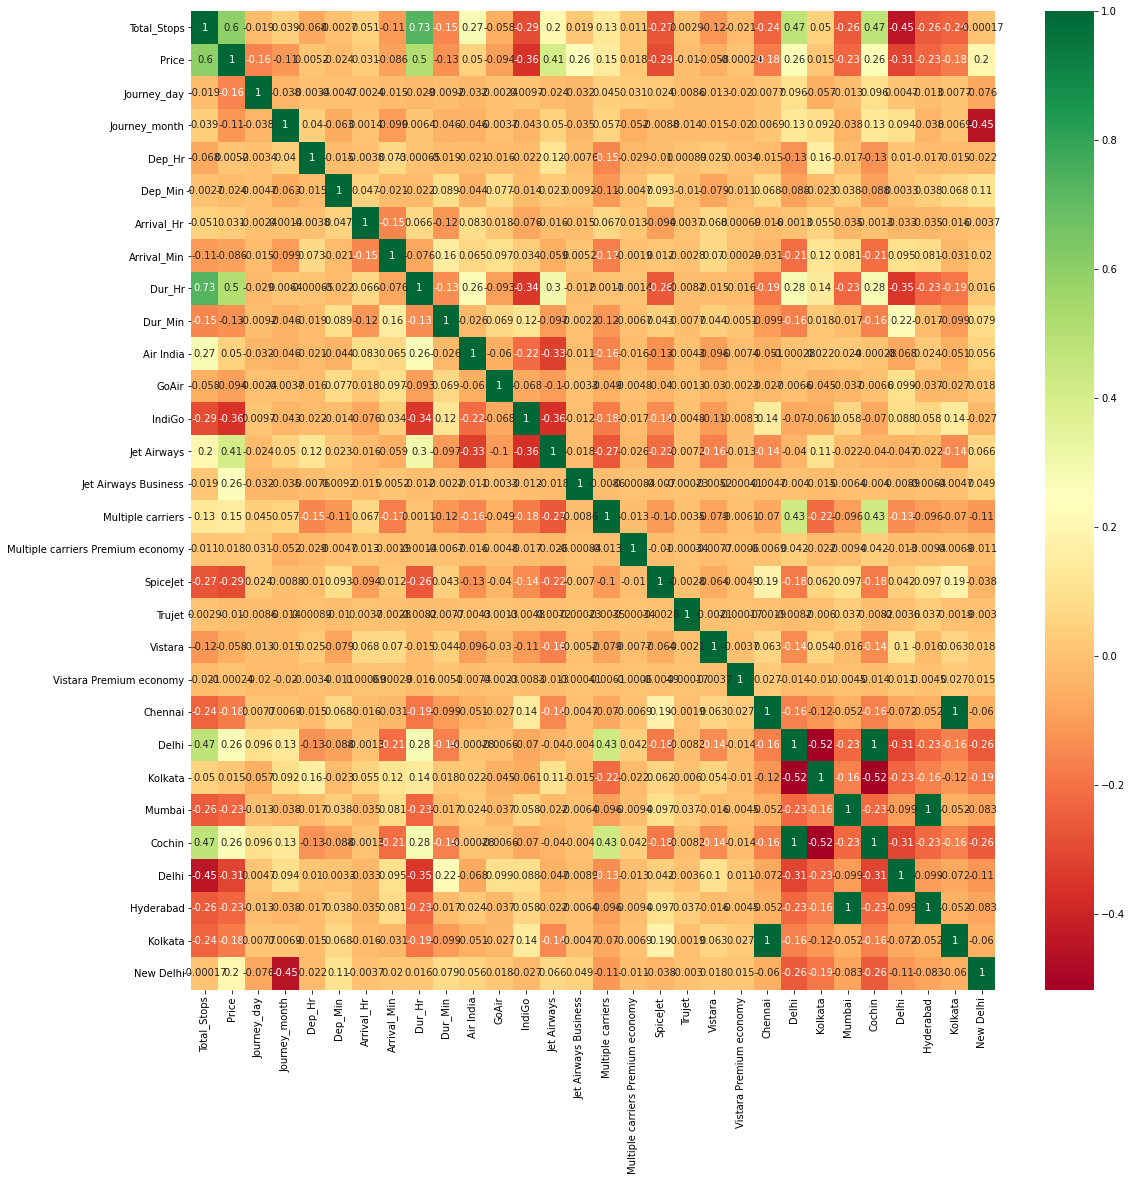

In [69]:
plt.figure(figsize = (18,18))
sns.heatmap(df_train.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [70]:
x = df_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_Hr',
       'Dep_Min', 'Arrival_Hr', 'Arrival_Min', 'Dur_Hr', 'Dur_Min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi']]

In [71]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [72]:
print(selection.feature_importances_)

[2.48459118e-01 1.44619667e-01 5.35483291e-02 2.45799225e-02
 2.11949228e-02 2.81700146e-02 1.95527965e-02 1.13593343e-01
 1.69911699e-02 1.09846919e-02 1.95777147e-03 1.41916096e-02
 1.28390915e-01 6.82041771e-02 2.09481139e-02 9.30754160e-04
 3.03707731e-03 1.08067638e-04 5.00087970e-03 6.93901440e-05
 3.35757192e-04 7.51623140e-03 4.96664418e-03 1.65076440e-03
 3.34980416e-04 5.16727213e-03 9.78425001e-03 7.32337000e-03
 4.82857550e-03 6.02252714e-03 1.99533657e-03 4.04373688e-04
 2.51371855e-02]


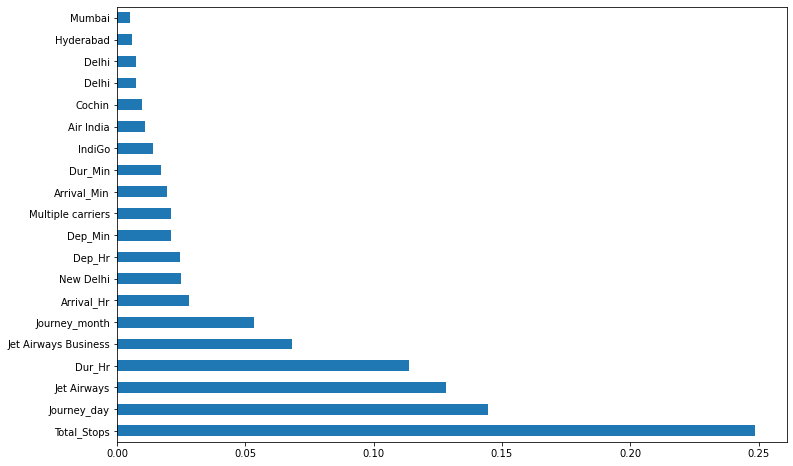

In [73]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

### 6.Modelling

* We will use Random Forest 

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset

##### 6.1  Split dataset into train and test set in order to prediction w.r.t X_test

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

##### 6.2 Import model

In [75]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

##### 6.3 Fit the data

In [76]:
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

##### 6.4 Predict with regard to X_test

In [77]:
y_pred = reg_rf.predict(X_test)

In [78]:
reg_rf.score(X_train, y_train)

0.9533701942057107

In [79]:
reg_rf.score(X_test, y_test)

0.8120658799843337

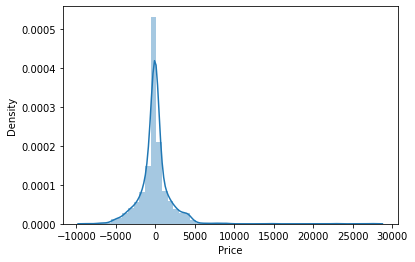

In [80]:
sns.distplot(y_test-y_pred)
plt.show()

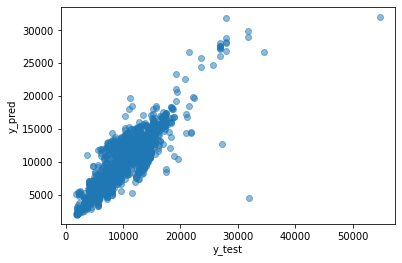

In [81]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [82]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1185.372431572913
MSE: 3918478.343165561
RMSE: 1979.5146736423958


---

## 7. Hyperparameter Tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [85]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [86]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [87]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [89]:
prediction = rf_random.predict(X_test)

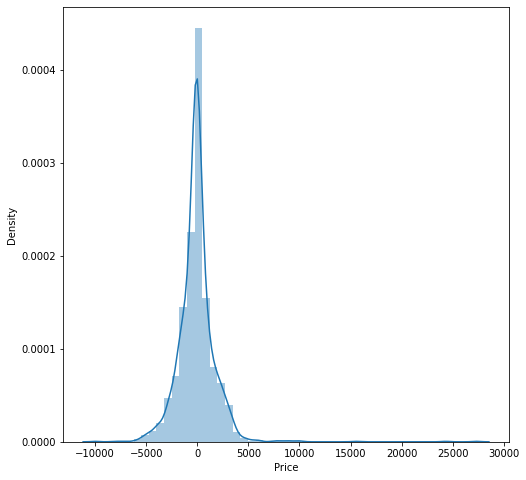

In [90]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

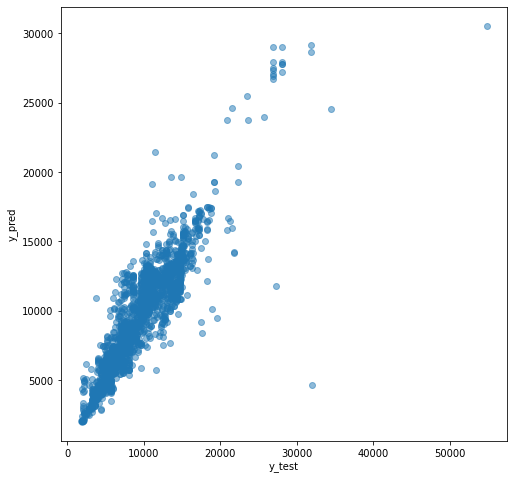

In [91]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1150.6461363168246
MSE: 3506188.427027542
RMSE: 1872.481889639401


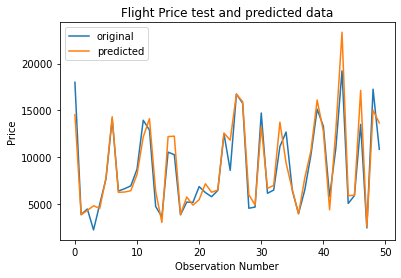

In [93]:
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

---

## 8.Save the model to reuse it again

In [94]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [95]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [96]:
y_prediction = forest.predict(X_test)

In [97]:
metrics.r2_score(y_test, y_prediction)

0.8120658799843337

  #  ****************************  The End ****************************